# Data Manipulation and Plotting with `pandas`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

![pandas](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/2880px-Pandas_logo.svg.png)

## Learning Goals

- Load .csv files into `pandas` DataFrames
- Describe and manipulate data in Series and DataFrames
- Visualize data using DataFrame methods and `matplotlib`

## What is Pandas?

Pandas, as [the Anaconda docs](https://docs.anaconda.com/anaconda/packages/py3.7_osx-64/) tell us, offers us "High-performance, easy-to-use data structures and data analysis tools." It's something like "Excel for Python", but it's quite a bit more powerful.

Let's read in the heart dataset.

Pandas has many methods for reading different types of files. Note that here we have a .csv file.

Read about this dataset [here](https://www.kaggle.com/ronitf/heart-disease-uci).

In [3]:
heart_df = pd.read_csv('heart.csv')

The output of the `.read_csv()` function is a pandas *DataFrame*, which has a familiar tabaular structure of rows and columns.

In [4]:
type(heart_df)

pandas.core.frame.DataFrame

In [5]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## DataFrames and Series

Two main types of pandas objects are the DataFrame and the Series, the latter being in effect a single column of the former:

In [6]:
age_series = heart_df['age']
type(age_series)

pandas.core.series.Series

In [7]:
heart_df.age

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64

Notice how we can isolate a column of our DataFrame simply by using square brackets together with the name of the column.

Both Series and DataFrames have an *index* as well:

In [8]:
heart_df.index

RangeIndex(start=0, stop=303, step=1)

In [9]:
age_series.index

RangeIndex(start=0, stop=303, step=1)

Pandas is built on top of NumPy, and we can always access the NumPy array underlying a DataFrame using `.values`.

In [10]:
heart_df.values

array([[63.,  1.,  3., ...,  0.,  1.,  1.],
       [37.,  1.,  2., ...,  0.,  2.,  1.],
       [41.,  0.,  1., ...,  0.,  2.,  1.],
       ...,
       [68.,  1.,  0., ...,  2.,  3.,  0.],
       [57.,  1.,  0., ...,  1.,  3.,  0.],
       [57.,  0.,  1., ...,  1.,  2.,  0.]])

## Basic DataFrame Attributes and Methods

### `.head()`

In [ ]:
heart_df.head()

### `.tail()`

In [ ]:
heart_df.tail()

### `.info()`

In [ ]:
heart_df.info()

### `.describe()`

In [ ]:
heart_df.describe()

### `.dtypes`

In [ ]:
heart_df.dtypes

### `.shape`

In [ ]:
heart_df.shape

### Exploratory Plots

Let's make ourselves a histogram of ages:

In [ ]:
sns.set_style('darkgrid')
sns.distplot(a=heart_df['age']);

And while we're at it let's do a scatter plot of maximum heart rate vs. age:

In [ ]:
sns.scatterplot(x=heart_df['age'], y=heart_df['thalach']);

## Adding to a DataFrame


### Adding Rows

Here are two rows that our engineer accidentally left out of the .csv file, expressed as a Python dictionary:

In [15]:
extra_rows = {'age': [40, 30], 'sex': [1, 0], 'cp': [0, 0], 'trestbps': [120, 130],
              'chol': [240, 200],
             'fbs': [0, 0], 'restecg': [1, 0], 'thalach': [120, 122], 'exang': [0, 1],
              'oldpeak': [0.1, 1.0], 'slope': [1, 1], 'ca': [0, 1], 'thal': [2, 3],
              'target': [0, 0]}
extra_rows

{'age': [40, 30],
 'sex': [1, 0],
 'cp': [0, 0],
 'trestbps': [120, 130],
 'chol': [240, 200],
 'fbs': [0, 0],
 'restecg': [1, 0],
 'thalach': [120, 122],
 'exang': [0, 1],
 'oldpeak': [0.1, 1.0],
 'slope': [1, 1],
 'ca': [0, 1],
 'thal': [2, 3],
 'target': [0, 0]}

How can we add this to the bottom of our dataset?

In [16]:
# Let's first turn this into a DataFrame.
# We can use the .from_dict() method.

missing = pd.DataFrame(extra_rows)
missing

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40,1,0,120,240,0,1,120,0,0.1,1,0,2,0
1,30,0,0,130,200,0,0,122,1,1.0,1,1,3,0


In [17]:
# Now we just need to concatenate the two DataFrames together.
# Note the `ignore_index` parameter! We'll set that to True.

heart_augmented = pd.concat([heart_df, missing],
                           ignore_index=True)

In [18]:
# Let's check the end to make sure we were successful!

heart_augmented.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0
303,40,1,0,120,240,0,1,120,0,0.1,1,0,2,0
304,30,0,0,130,200,0,0,122,1,1.0,1,1,3,0


### Adding Columns

Adding a column is very easy in `pandas`. Let's add a new column to our dataset called "test", and set all of its values to 0.

In [19]:
heart_augmented['test'] = 0

In [20]:
heart_augmented.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,test
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


I can also add columns whose values are functions of existing columns.

Suppose I want to add the cholesterol column ("chol") to the resting systolic blood pressure column ("trestbps"):

In [21]:
heart_augmented['chol+trestbps'] = heart_augmented['chol'] + heart_augmented['trestbps']

In [22]:
heart_augmented.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,test,chol+trestbps
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,378
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,380
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,334
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,356
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,474


## Filtering

We can use filtering techniques to see only certain rows of our data. If we wanted to see only the rows for patients 70 years of age or older, we can simply type:

In [23]:
heart_augmented[heart_augmented['age'] >= 70]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,test,chol+trestbps
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1,0,462
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1,0,375
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1,0,389
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1,0,337
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2,1,0,401
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1,0,261
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0,319
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0,0,452
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0,0,429
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0,0,429


Use '&' for "and" and '|' for "or".

### Exercise

Display the patients who are 70 or over as well as the patients whose trestbps score is greater than 170.

<details>
    <summary>Answer</summary>
    <code>heart_augmented[(heart_augmented['age'] >= 70) | (heart_augmented['trestbps'] > 170)]</code>
    </details>

### Exploratory Plot

Using the subframe we just made, let's make a scatter plot of their cholesterol levels vs. age and color by sex:

In [ ]:
at_risk = #[ANSWER FROM EXERCISE]

sns.scatterplot(data=at_risk, x='age', y='chol', hue='sex');

### `.loc` and `.iloc`

We can use `.loc` to get, say, the first ten values of the age and resting blood pressure ("trestbps") columns:

In [ ]:
heart_augmented.loc

In [24]:
heart_augmented.loc[:9, ['age', 'trestbps']]

,age,trestbps
0,63,145
1,37,130
2,41,130
3,56,120
4,57,120
5,57,140
6,56,140
7,44,120
8,52,172
9,57,150


`.iloc` is used for selecting locations in the DataFrame **by number**:

In [ ]:
heart_augmented.iloc

In [ ]:
heart_augmented.iloc[3, 0]

### Exercise

How would we get the same slice as just above by using .iloc() instead of .loc()?

In [25]:

heart_augmented.iloc[:9, [0,3]]

,age,trestbps
0,63,145
1,37,130
2,41,130
3,56,120
4,57,120
5,57,140
6,56,140
7,44,120
8,52,172


<details>
    <summary>Answer</summary>
    <code>heart_augmented.iloc[:10, [0, 3]]</code>
    </details>

## Statistics

### `.mean()`

In [ ]:
heart_augmented.mean()

Be careful! Some of these will are not straightforwardly interpretable. What does an average "sex" of 0.682 mean?

### `.min()`

In [ ]:
heart_augmented.min()

### `.max()`

In [ ]:
heart_augmented.max()

## Series Methods

### `.value_counts()`

How many different values does have slope have? What about sex? And target?

In [ ]:
heart_augmented['slope'].value_counts()

### `.sort_values()`

In [ ]:
heart_augmented['age'].sort_values()

## `pandas`-Native Plotting

The `.plot()` and `.hist()` methods available for DataFrames use a wrapper around `matplotlib`:

In [ ]:
heart_augmented.plot(x='age', y='trestbps', kind='scatter');

In [ ]:
heart_augmented.hist(column='chol');

## Exercises

1. Make a bar plot of "age" vs. "slope" for the `heart_augmented` DataFrame.

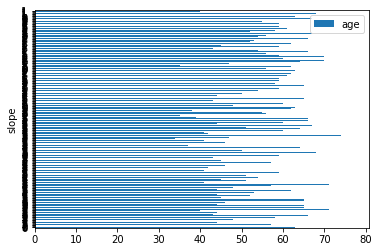

In [32]:
heart_augmented.plot.barh(x= 'slope', y = 'age');

<details>
    <summary>Answer</summary>
    <code>sns.barplot(data=heart_augmented, x='slope', y='age');</code>
    </details>

2. Make a histogram of ages for **just the men** in `heart_augmented` (heart_augmented['sex']=1).

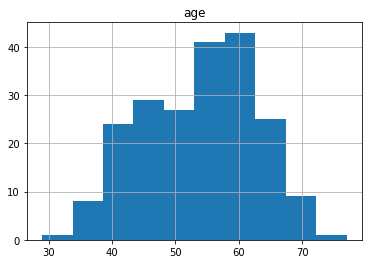

In [52]:

men = heart_augmented[heart_augmented['sex'] == 1]
#sns.histplot(men['age']);
#3men["age"]
men.hist(column= "age");


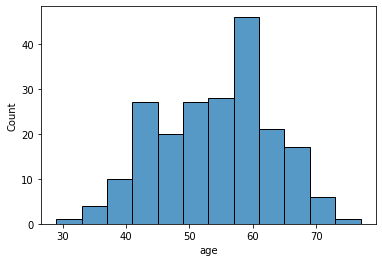

In [53]:
sns.histplot(men['age']);

<details>
    <summary>Answer</summary>
<code>men = heart_augmented[heart_augmented['sex'] == 1]
sns.distplot(a=men['age']);</code>
    </details>

In [61]:
heart_augmented.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            305 non-null    int64  
 1   sex            305 non-null    int64  
 2   cp             305 non-null    int64  
 3   trestbps       305 non-null    int64  
 4   chol           305 non-null    int64  
 5   fbs            305 non-null    int64  
 6   restecg        305 non-null    int64  
 7   thalach        305 non-null    int64  
 8   exang          305 non-null    int64  
 9   oldpeak        305 non-null    float64
 10  slope          305 non-null    int64  
 11  ca             305 non-null    int64  
 12  thal           305 non-null    int64  
 13  target         305 non-null    int64  
 14  test           305 non-null    int64  
 15  chol+trestbps  305 non-null    int64  
dtypes: float64(1), int64(15)
memory usage: 38.2 KB


3. Make separate scatter plots of cholesterol vs. resting systolic blood pressure for the target=0 and the target=1 groups. Put both plots on the same figure and give each an appropriate title.

<details>
    <summary>Answer</summary>
<code>target0 = heart_augmented[heart_augmented['target'] == 0]
target1 = heart_augmented[heart_augmented['target'] == 1]
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(data=target0, x='trestbps', y='chol', ax=ax[0])
sns.scatterplot(data=target1, x='trestbps', y='chol', ax=ax[1])
ax[0].set_title('Cholesterol Vs. Resting Blood Pressure in Women')
    ax[1].set_title('Cholesterol Vs. Resting Blood Pressure in Men');</code>
    </details>

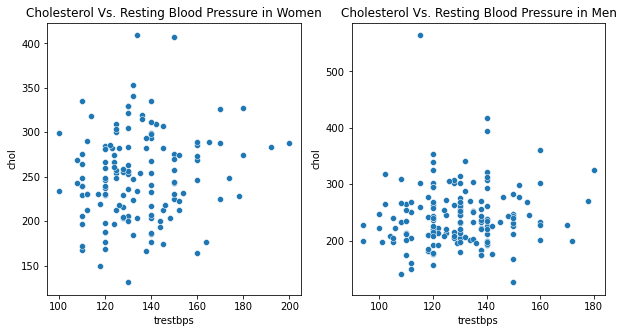

In [72]:
target0 = heart_augmented[heart_augmented['target'] == 0]
target1 = heart_augmented[heart_augmented['target'] == 1]
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(data=target0, x='trestbps', y='chol', ax=ax[0])
sns.scatterplot(data=target1, x='trestbps', y='chol', ax=ax[1])
ax[0].set_title('Cholesterol Vs. Resting Blood Pressure in Women')
ax[1].set_title('Cholesterol Vs. Resting Blood Pressure in Men');

<AxesSubplot:xlabel='trestbps', ylabel='chol'>

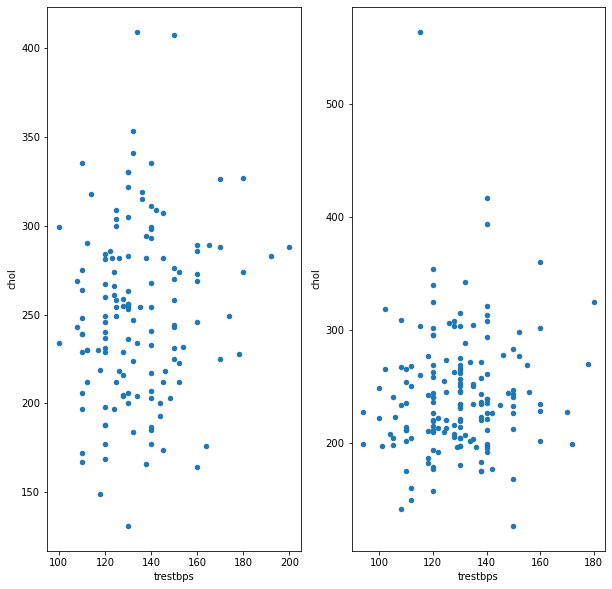

In [70]:
target0 = heart_augmented[heart_augmented['target'] == 0]
target1 = heart_augmented[heart_augmented['target'] == 1]

fig, ax = plt.subplots(1,2, figsize = (10,10))

target0.plot(x= "trestbps", y = 'chol', kind = 'scatter',ax=ax[0])
target1.plot(x = "trestbps", y = "chol", kind = 'scatter', ax=ax[1])


In [67]:
target0.head()

0    False
1    False
2    False
3    False
4    False
Name: target, dtype: bool

## Let's find a .csv file online and experiment with it.

I'm going to head to [dataportals.org](https://dataportals.org) to find a .csv file.